<a href="https://colab.research.google.com/github/kushal-g/FlightDelayPredictor/blob/master/More%20models/SGDRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

In [0]:
import pandas as pd

In [0]:
from sklearn.linear_model import SGDRegressor

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [5]:
cd /content/gdrive/My\ Drive

/content/gdrive/My Drive


In [0]:
df = pd.read_csv("flights_svr.csv")

In [0]:
pd.options.display.max_seq_items = 2000

In [0]:
#PREDICT DEPARTURE DELAY

In [0]:
cols = [c for c in df.columns if c[:22] != 'ORIGIN_AIRPORT_ARRIVAL']
cols = [c for c in cols if c[:27] != 'DESTINATION_AIRPORT_ARRIVAL']
cols = [c for c in cols if c[:20] !="TAIL_NUMBERS_ARRIVAL"]

In [0]:
X = df[cols].drop(["Unnamed: 0","DEPARTURE_DELAY","ARRIVAL_DELAY","ARRIVAL_DELAY_BOOL","DEPARTURE_DELAY_BOOL"],axis=1)

In [0]:
y = df["DEPARTURE_DELAY"]

In [0]:
model = SGDRegressor(max_iter=len(df))

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
%timeit model.fit(X_train,y_train)

1 loop, best of 3: 4min 46s per loop


In [0]:
predictions = model.predict(X_test)

In [29]:
predictions[:5]

array([6.42141883e+12, 2.11505805e+13, 3.99343417e+12, 2.17256943e+13,
       1.30477738e+13])

In [0]:
import matplotlib.pyplot as plt

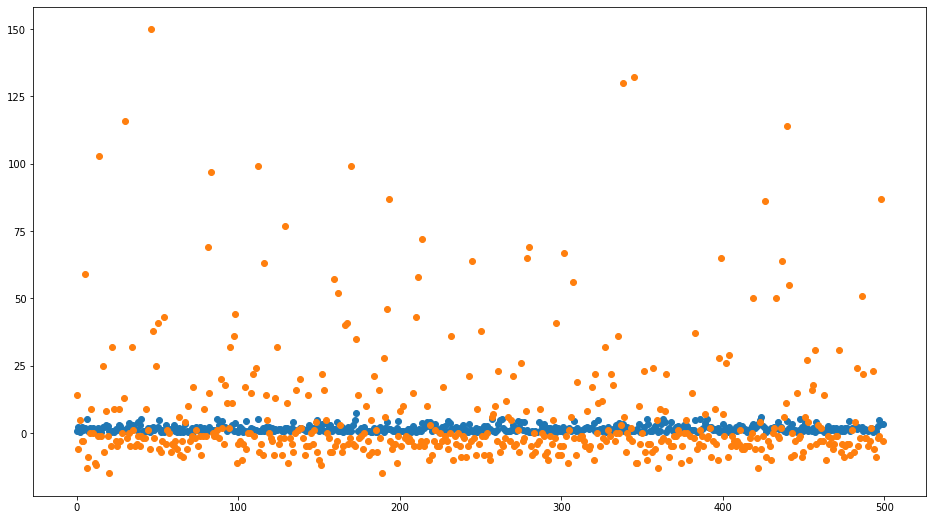

In [74]:
plt.rcParams["figure.figsize"] = (16,9)
plt.scatter(range(len(predictions[:500])),(predictions/10**13)[:500])
plt.scatter(range(len(y_test[:500])),y_test[:500])